In [9]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


In [12]:
len(X_train_full)

15480

In [13]:
len(X_test)

5160

In [14]:
len(X_valid)

3870

In [15]:
len(X_train)

11610

In [16]:
# Convert x_train dataset into a DataFrame with attribute names
df_train = pd.DataFrame(X_train_full, columns=housing.feature_names)

# Print the DataFrame 
print(df_train.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  4.2143      37.0  5.288235   0.973529       860.0  2.529412     33.81   
1  5.3468      42.0  6.364322   1.087940       957.0  2.404523     37.16   
2  3.9191      36.0  6.110063   1.059748       711.0  2.235849     38.45   
3  6.3703      32.0  6.000000   0.990196      1159.0  2.272549     34.16   
4  2.3684      17.0  4.795858   1.035503       706.0  2.088757     38.57   

   Longitude  
0    -118.12  
1    -121.98  
2    -122.69  
3    -118.41  
4    -121.33  


# Standardize the Data

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [18]:
len(X_valid)

3870

In [39]:
np.random.seed(42)
tf.random.set_seed(42)

# Let us now define the model architecture

In [40]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"), 
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
104/363 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 3.8130

/Users/abroadhub/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 2.4585 - val_loss: 0.7755
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.7133 - val_loss: 0.6185
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.6421 - val_loss: 0.5599
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.5964 - val_loss: 0.5203
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.5602 - val_loss: 0.4897
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.5319 - val_loss: 0.4662
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.5097 - val_loss: 0.4480
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.4917 - val_loss: 0.4333
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.4772 - val_loss: 0.4220
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 0.4651 - val_loss: 0.4140
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.4550 - val_loss: 0.4080
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 

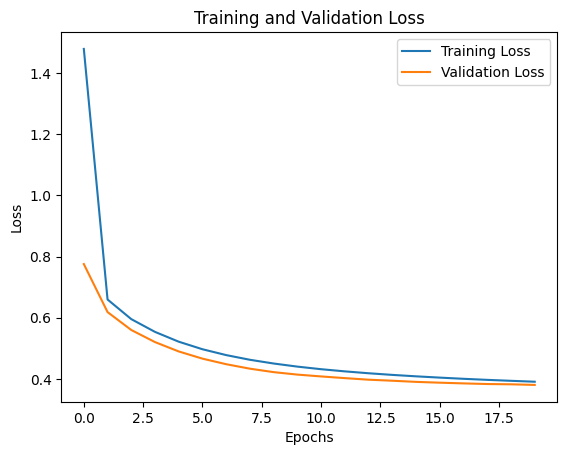

In [41]:
# Plot the Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training and Validation Loss")
plt.show()

# Let us evaluate the model on the Test set

In [42]:
mse_test = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 0.3890


In [43]:
# Make predictions on new data
X_new = X_test[:3]
y_pred = model.predict(X_new)

# Compare predictions with actual values
for i in range(len(X_new)):
    print(f"Sample {i+1}: ")
    print(f"Predicated: {y_pred[i][0]}")
    print(f"Actual: {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Sample 1: 
Predicated: 0.7614067792892456
Actual: 0.477
Sample 2: 
Predicated: 1.7741620540618896
Actual: 0.458
Sample 3: 
Predicated: 3.7442336082458496
Actual: 5.00001
